<a href="https://colab.research.google.com/github/tigureis/Projeto-de-Tratamento-e-Jun-o-de-Dados/blob/main/Working_with_Two_Databases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importe as bibliotecas Pandas e Seaborn

In [ ]:
import pandas as pd
import seaborn as sns

Importe e leia os arquivos

In [ ]:
vendas=pd.read_excel('/content/varejo (1).xlsx')
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


Localize problemas nos dados e corrija-os

In [ ]:
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
APP,139
Aplicativo,21425
Internet,24515
Mobile,24732


Corrigindo 2 campos aplicativo com 2 nomes diferentes

In [ ]:
vendas['idcanalvenda']=vendas['idcanalvenda'].str.replace("APP", "Aplicativo")
vendas.groupby("idcanalvenda").idcompra.nunique()

,idcompra
idcanalvenda,
Aplicativo,21539
Internet,24515
Mobile,24732


In [ ]:
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios e Inovacoes,3548
Alimentos,2
Ar e Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza e Saude,4626
Brinquedos,1320
"Cama, Mesa e Banho",153


In [ ]:
vendas.groupby("estado").idcompra.nunique()

,idcompra
estado,
AC,10
AL,461
AM,15
AP,3
BA,2028
CE,1007
DF,1902
ES,1254
GO,1603


Inserindo "_" no lugar do espaço entre as chaves do 'Nome_Departamento'

In [ ]:
vendas['Nome_Departamento']=vendas['Nome_Departamento'].str.replace(" ", "_")
vendas.groupby("Nome_Departamento").idcompra.nunique()

,idcompra
Nome_Departamento,
Acessorios_e_Inovacoes,3548
Alimentos,2
Ar_e_Ventilacao,951
Audio,1794
Automotivo,895
Bebes,4531
Beleza_e_Saude,4626
Brinquedos,1320
"Cama,_Mesa_e_Banho",153


Verificando dados nulos

In [ ]:
vendas[vendas['estado'].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


Substitua os estadous nulos por Mato Grosso do Sul e os preços nulos pela média de preço.

In [ ]:
vendas['estado'].fillna('MS', inplace=True)
mediapreco=vendas['Preço'].mean()
vendas['Preço'].fillna(mediapreco, inplace=True)
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


<ipython-input-10-1085ff116720>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas['estado'].fillna('MS', inplace=True)
<ipython-input-10-1085ff116720>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
vendas[['Preço','Preço_com_frete']].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


Elimine as vendas em que o preço com frete é menor que o preço do item:

In [ ]:
preco_errado=vendas.query('Preço > Preço_com_frete')
preco_errado.head()
vendas_correta=vendas.query('Preço < Preço_com_frete')

In [ ]:
vendas_correta.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


Descubra os departamentos com mais vendas

In [ ]:
vendas_correta.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False)

,idcompra
Nome_Departamento,
Bebes,4353
Eletrodomesticos,4201
Eletroportateis,2223
Moveis,2036
Utilidades_Domesticas,1366
Acessorios_e_Inovacoes,1243
Beleza_e_Saude,1054
Brinquedos,686
Perfumaria,563


Descubra a media de preço por departamento:

In [ ]:
round(vendas_correta.groupby("Nome_Departamento")['Preço_com_frete'].agg("mean").sort_values(ascending=False).reset_index(),2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


Descubra a quantidade de vendas por mes:

In [ ]:
vendas_correta["Mes"] = vendas_correta['Data'].dt.month
vendas_correta.groupby('Mes').idcompra.nunique().sort_values(ascending=False).reset_index()

<ipython-input-16-a1eec3504dd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_correta["Mes"] = vendas_correta['Data'].dt.month


,Mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


# Trabalhando com uma segunda base

---

importando a nova base

In [ ]:
clientes=pd.read_excel('/content/cliente_varejo.xlsx')
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


Verificando novos dados inserindo

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
clientes.describe()

,cliente_Log,idade,renda
count,26425.000000,26425.000000,26425.000000
mean,13937.414456,53.412564,8241.470350
std,8066.941892,20.698825,3899.871482
min,1.000000,18.000000,1500.000000
25%,6920.000000,35.000000,4859.000000
50%,13946.000000,53.000000,8234.000000
75%,20926.000000,71.000000,11629.000000
max,27982.000000,89.000000,15000.000000


Transformando dados (renda para float)

In [ ]:
clientes['renda']=clientes['renda'].astype(float)
clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337.0
1,17590,54,2050.0
2,15478,47,8258.0
3,2933,39,4671.0
4,19790,26,9207.0


Unindo os DataFrames

In [ ]:
DF=vendas_correta.merge(clientes, how='left', on='cliente_Log')
DF.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


Media de renda para cada tipo de canal de venda

In [ ]:
agg_canal_venda=round(DF.groupby('idcanalvenda').renda.mean().sort_values(ascending=False).reset_index(),2)
agg_canal_venda

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


Media de idade por bandeira

In [ ]:
agg_idade_bandeira=DF.groupby('bandeira').idade.mean().sort_values(ascending=False).reset_index()
agg_idade_bandeira


,bandeira,idade
0,A,53.303003
1,B,53.287576


# Graficos

---
# Matplotlib

---


Importa as bibliotecas

In [ ]:
import matplotlib.pyplot as plt


Plotando a media de idades por bandeiras em grafico de barra

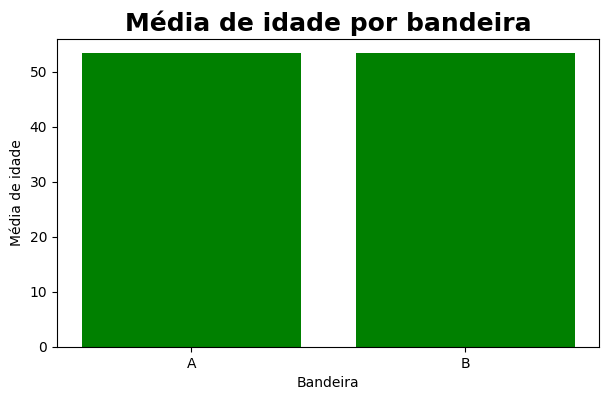

In [ ]:
fig=plt.figure(figsize=(7,4))
plt.bar(agg_idade_bandeira['bandeira'], agg_idade_bandeira['idade'],color="green")
plt.title('Média de idade por bandeira',loc='center', fontsize=18,fontweight='bold',color='black')
plt.xlabel('Bandeira')
plt.ylabel('Média de idade')
plt.show()

plotando media de renda por canal de venda, como grafico de barra

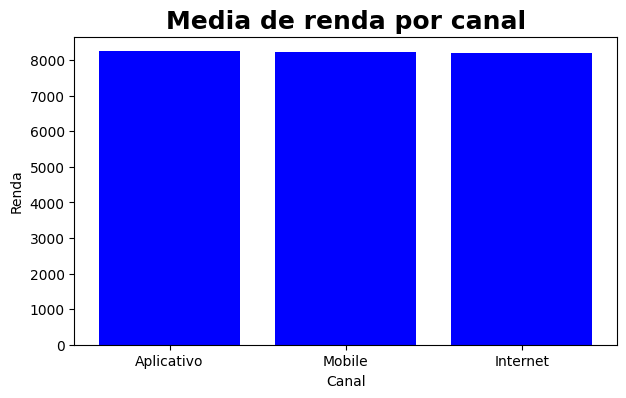

In [ ]:
fig2=plt.figure(figsize=(7,4))
plt.bar(agg_canal_venda["idcanalvenda"], agg_canal_venda["renda"],color="blue")
plt.title('Media de renda por canal',loc='center', fontsize=18,fontweight='bold',color='black')
plt.xlabel('Canal')
plt.ylabel('Renda')
plt.show()

Plotando vendas por data como grafico de linha
(criando variavel x e y ao invez de chamar os dados direto na função plot)

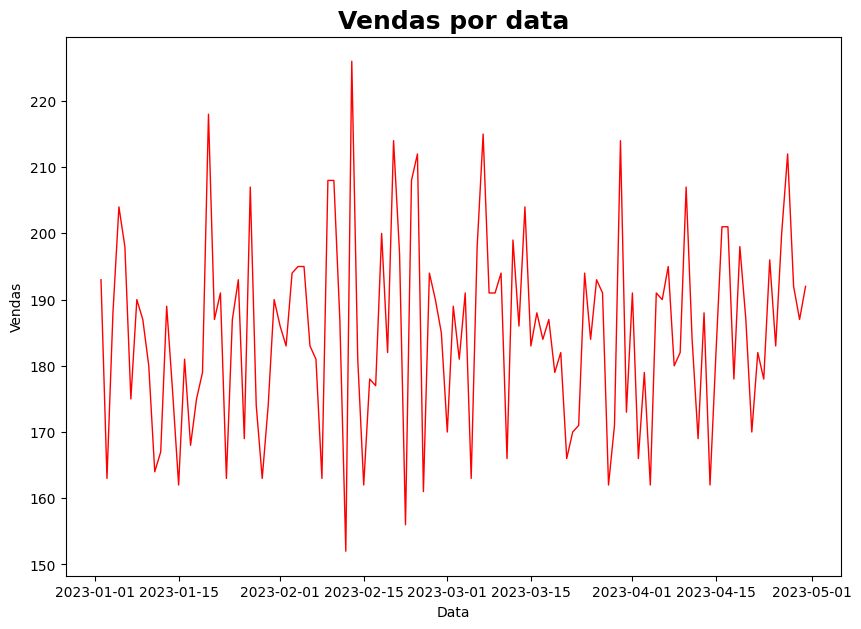

In [ ]:
venda_por_data=vendas_correta.groupby('Data').idcompra.nunique().reset_index()
fig3=plt.figure(figsize=(10,7))
x=venda_por_data['Data']
y=venda_por_data['idcompra']
plt.title('Vendas por data',loc='center', fontsize=18,fontweight='bold',color='black')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.plot(x,y,color="red", linewidth=1)
plt.show()
#

Plotando média de preço por departamento

Text(0, 0.5, 'Preço')

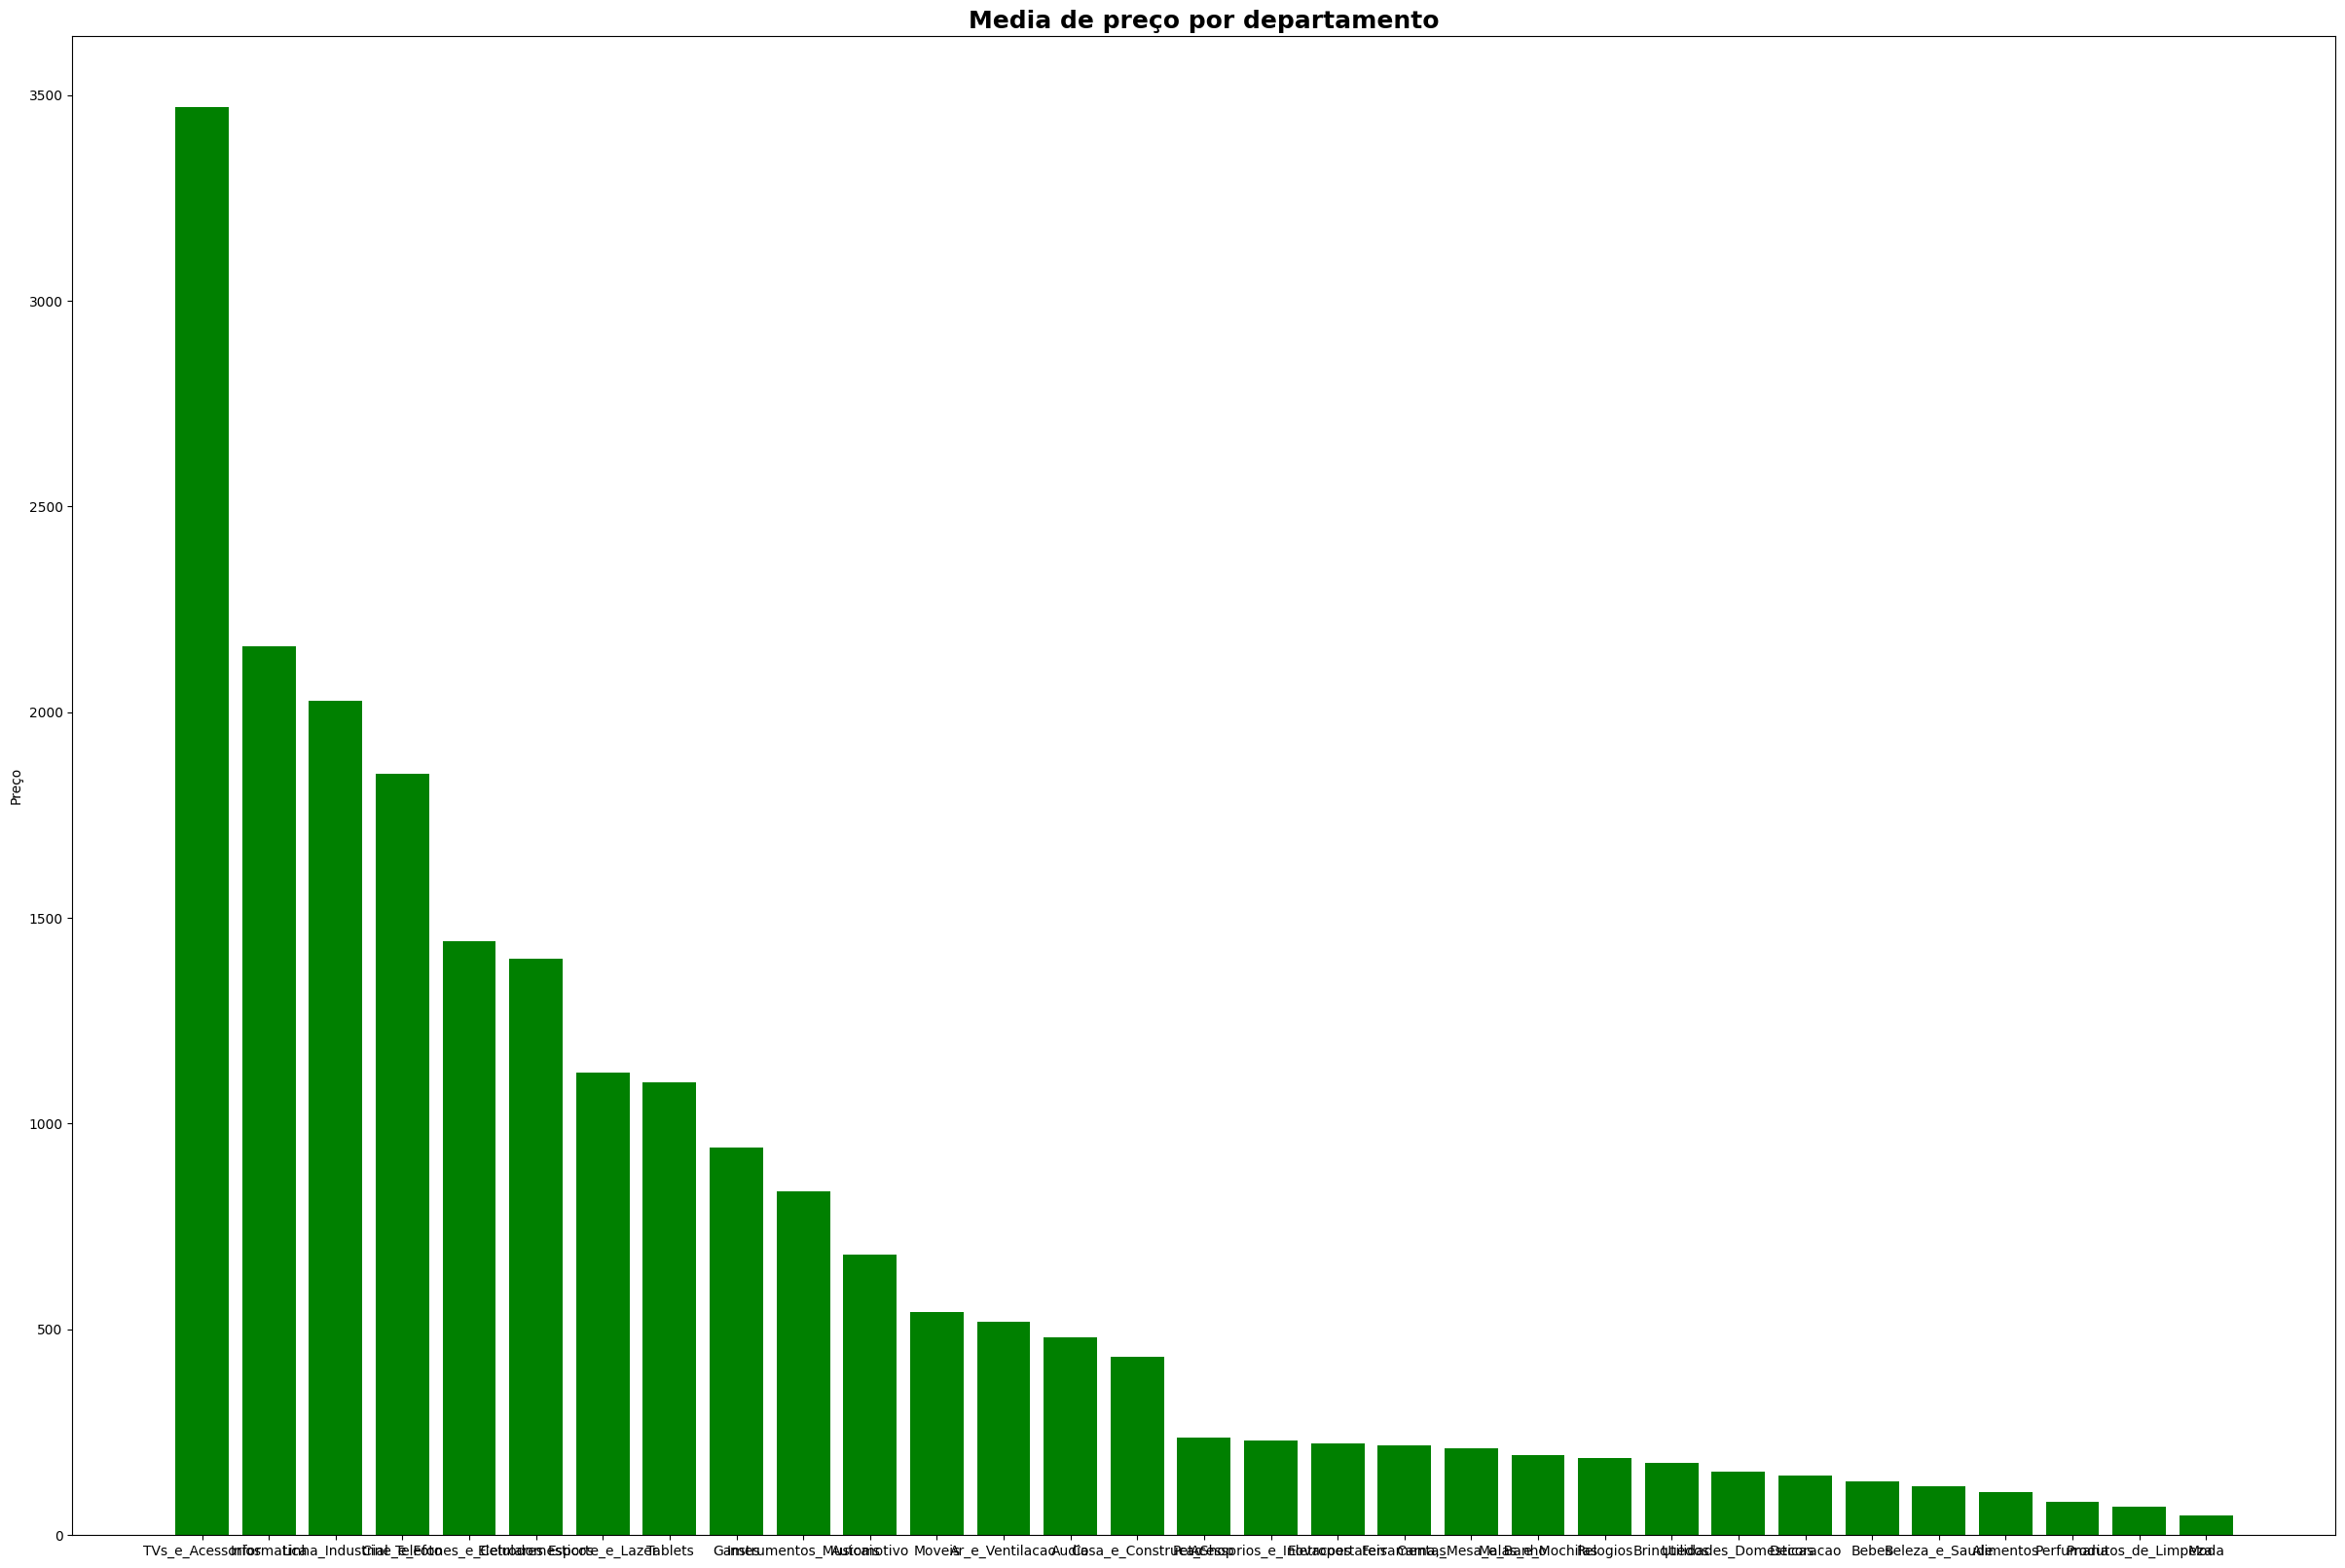

In [ ]:
agg_departamento_precos=round(vendas_correta.groupby('Nome_Departamento')['Preço_com_frete'].agg('mean').sort_values(ascending=False).reset_index(),2)
fig4=plt.figure(figsize=(30,20))
plt.bar(agg_departamento_precos['Nome_Departamento'], agg_departamento_precos['Preço_com_frete'],color="green")
plt.title('Media de preço por departamento',loc='center', fontsize=18,fontweight='bold',color='black')
plt.ylabel('Preço')



# Graficos com Plotly

---

é nescessario instalar as bibliotecas, *pois essas não vem de padrão nessa versão do python*

In [ ]:
%pip install plotly;
%pip install cufflinks;
%pip install chart-studio;

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00


Importando as bibliotecas

In [ ]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objs as go
import plotly.express as px

Plotando os graficos anteriores com a biblioteca Plotly

In [ ]:
px.bar(agg_idade_bandeira, x='bandeira', y='idade', title='Média de idade por bandeira')

In [ ]:
px.line(venda_por_data, x='Data', y='idcompra', title='Vendas por data')

In [ ]:
px.bar(agg_departamento_precos, x='Nome_Departamento', y='Preço_com_frete', title='Média de preço por departamento')